In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [61]:
data=pd.read_excel("/content/drive/MyDrive/Data sets/Copy of Copy of Airbnb NYC 2019.xlsx")
data1=data.drop(columns=["name","host_id","host_name"])
data1

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [62]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   neighbourhood_group             48895 non-null  object        
 2   neighbourhood                   48895 non-null  object        
 3   latitude                        48895 non-null  float64       
 4   longitude                       48895 non-null  float64       
 5   room_type                       48895 non-null  object        
 6   price                           48895 non-null  int64         
 7   minimum_nights                  48895 non-null  int64         
 8   number_of_reviews               48895 non-null  int64         
 9   last_review                     38843 non-null  datetime64[ns]
 10  reviews_per_month               38843 non-null  float64       
 11  ca

In [63]:
data1.isna().mean()

,0
id,0.000000
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000
minimum_nights,0.000000
number_of_reviews,0.000000
last_review,0.205583


<Axes: >

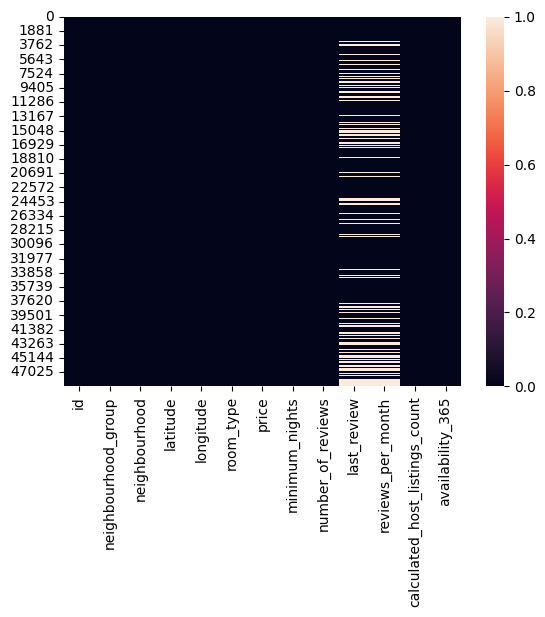

In [64]:
sns.heatmap(data1.isnull())

In [65]:
columns=[i for i in data1.columns if i!="id"]
for column in columns:
    print(data1[column].value_counts())
    print(data1[column].nunique())


neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64
5
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64
221
latitude
40.71813    18
40.69414    13
40.68634    13
40.68444    13
40.68537    12
            ..
40.83423     1
40.65784     1
40.61283     1
40.63236     1
40.75285     1
Name: count, Length: 19048, dtype: int64
19048
longitude
-73.95677    18
-73.95427    18
-73.95405    17
-73.95060    16
-73.95136    16
             ..
-73.85862     1
-73.80844     1
-73.90481     1
-73.90316     1
-73.89902     1
Name: count, Length: 14718, dtype: int64
14718
room_type
Entire home/apt    

***OBSERVATION 1: "neighbourhood_group" and "room_type" NEEDS TO BE CONVERTED TO NUMERICAL TYPE FROM CATEGORICAL TYPE.***

***OBSERVATION 2: "neighbourhood" DOESN'T SERVE ANY PURPOSE.***


In [66]:
data1=data1.drop(columns=["neighbourhood"])

In [67]:
ohe=OneHotEncoder()
nei_encoder= ohe.fit_transform(data1[["neighbourhood_group","room_type"]])
nei_encoder.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [68]:
d=pd.DataFrame(nei_encoder.toarray(),columns=ohe.get_feature_names_out(["neighbourhood_group","room_type"]))
d

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
48890,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48891,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48892,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
48893,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [69]:
data1=pd.concat([data1.drop(columns=["neighbourhood_group","room_type"]),d],axis=1)
data1

,id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2595,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3647,40.80902,-73.94190,150,3,0,NaT,NaN,1,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3831,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5022,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,40.67853,-73.94995,70,2,0,NaT,NaN,2,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48891,36485057,40.70184,-73.93317,40,4,0,NaT,NaN,2,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48892,36485431,40.81475,-73.94867,115,10,0,NaT,NaN,1,27,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
48893,36485609,40.75751,-73.99112,55,1,0,NaT,NaN,6,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


***CONVERTED CATEGORICAL DATA TO NUMERIC TYPE***

In [70]:
data1[data1.duplicated()]

,id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room


***NO DUPLICATE VALUES***

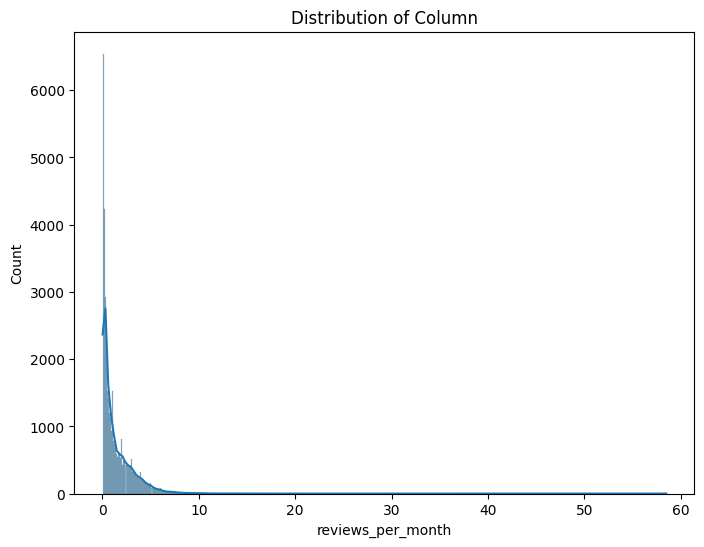

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(data1['reviews_per_month'], kde=True)
plt.title('Distribution of Column')
plt.show()


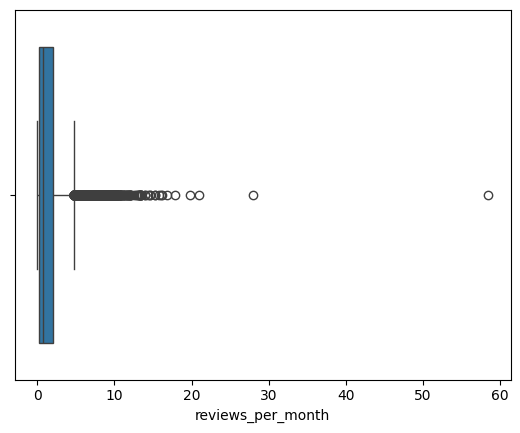

In [72]:
sns.boxplot(x=data1['reviews_per_month'])
plt.show()


In [73]:
data1["reviews_per_month"].skew(skipna=True)

np.float64(3.13018853561771)

***ALL THESE RESULTS SHOWS THAT THE "reviews_per_month" COLUMN IS HIGHLY SKEWED.***

In [74]:
data1["reviews_per_month_median"]=data1["reviews_per_month"].fillna(data1["reviews_per_month"].median())
data1

,id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,reviews_per_month_median
0,2539,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.21
1,2595,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.38
2,3647,40.80902,-73.94190,150,3,0,NaT,NaN,1,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.72
3,3831,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.64
4,5022,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,40.67853,-73.94995,70,2,0,NaT,NaN,2,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.72
48891,36485057,40.70184,-73.93317,40,4,0,NaT,NaN,2,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.72
48892,36485431,40.81475,-73.94867,115,10,0,NaT,NaN,1,27,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.72
48893,36485609,40.75751,-73.99112,55,1,0,NaT,NaN,6,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.72


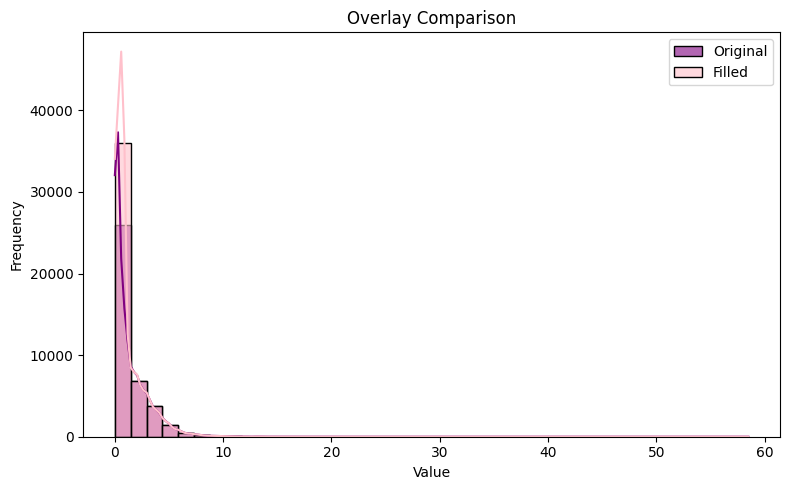

In [75]:
plt.figure(figsize=(8,5))
sns.histplot(data1["reviews_per_month"], kde=True, color='purple', alpha=0.6, label='Original', bins=40)
sns.histplot(data1["reviews_per_month_median"], kde=True, color='pink', alpha=0.6, label='Filled', bins=40)
plt.title('Overlay Comparison')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


***THUS THE MEDIAN VALUES FIT QUIET WELL.***




In [76]:
#data1=data1.drop(["reviews_per_month"],axis=1)

In [77]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 48895 non-null  int64         
 1   latitude                           48895 non-null  float64       
 2   longitude                          48895 non-null  float64       
 3   price                              48895 non-null  int64         
 4   minimum_nights                     48895 non-null  int64         
 5   number_of_reviews                  48895 non-null  int64         
 6   last_review                        38843 non-null  datetime64[ns]
 7   reviews_per_month                  38843 non-null  float64       
 8   calculated_host_listings_count     48895 non-null  int64         
 9   availability_365                   48895 non-null  int64         
 10  neighbourhood_group_Bronx         

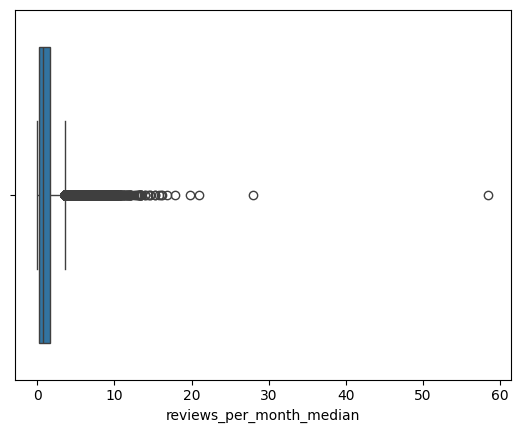

In [78]:
sns.boxplot(x=data1['reviews_per_month_median'])
plt.show()


In [79]:
def IQR(d,c):
    Q1=d[c].quantile(0.25)
    Q3=d[c].quantile(0.75)
    iqr=Q3-Q1
    lower=Q1-1.5*iqr
    upper=Q3+1.5*iqr
    d_cleaned=d[(d[c]>=lower) & (d[c]<=upper)]
    return d_cleaned
data1=IQR(data1,"reviews_per_month_median")

In [80]:
data1

,id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,reviews_per_month_median
0,2539,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.21
1,2595,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.38
2,3647,40.80902,-73.94190,150,3,0,NaT,NaN,1,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.72
4,5022,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.10
5,5099,40.74767,-73.97500,200,3,74,2019-06-22,0.59,1,129,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,40.67853,-73.94995,70,2,0,NaT,NaN,2,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.72
48891,36485057,40.70184,-73.93317,40,4,0,NaT,NaN,2,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.72
48892,36485431,40.81475,-73.94867,115,10,0,NaT,NaN,1,27,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.72
48893,36485609,40.75751,-73.99112,55,1,0,NaT,NaN,6,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.72


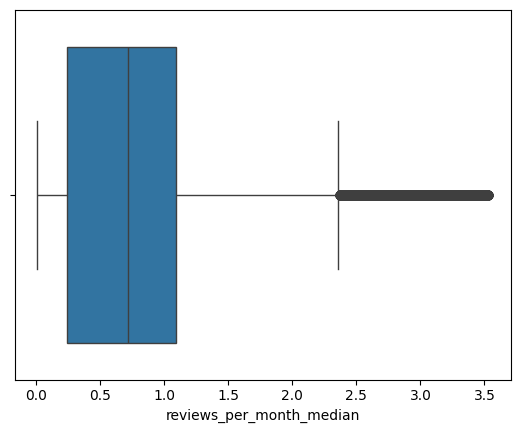

In [81]:
sns.boxplot(x=data1['reviews_per_month_median'])
plt.show()


***OUTLIERS REMOVED***

In [87]:
data1=data1[data1["number_of_reviews"]>0]
data1

,id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,reviews_per_month_median,reviews_log_transformed
0,2539,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.21,0.190620
1,2595,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.38,0.322083
4,5022,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.10,0.095310
5,5099,40.74767,-73.97500,200,3,74,2019-06-22,0.59,1,129,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.59,0.463734
6,5121,40.68688,-73.95596,60,45,49,2017-10-05,0.40,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.40,0.336472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,40.78099,-73.95366,129,1,1,2019-07-07,1.00,1,147,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.00,0.693147
48790,36427429,40.75104,-73.81459,45,1,1,2019-07-07,1.00,6,339,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00,0.693147
48799,36438336,40.54179,-74.14275,235,1,1,2019-07-07,1.00,1,87,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.00,0.693147
48805,36442252,40.80787,-73.92400,100,1,2,2019-07-07,2.00,1,40,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.00,1.098612


In [88]:
data1['reviews_log_transformed'] = np.log1p(data1['reviews_per_month_median'])

In [89]:
data1

,id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,reviews_per_month_median,reviews_log_transformed
0,2539,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.21,0.190620
1,2595,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.38,0.322083
4,5022,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.10,0.095310
5,5099,40.74767,-73.97500,200,3,74,2019-06-22,0.59,1,129,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.59,0.463734
6,5121,40.68688,-73.95596,60,45,49,2017-10-05,0.40,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.40,0.336472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,40.78099,-73.95366,129,1,1,2019-07-07,1.00,1,147,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.00,0.693147
48790,36427429,40.75104,-73.81459,45,1,1,2019-07-07,1.00,6,339,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00,0.693147
48799,36438336,40.54179,-74.14275,235,1,1,2019-07-07,1.00,1,87,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.00,0.693147
48805,36442252,40.80787,-73.92400,100,1,2,2019-07-07,2.00,1,40,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.00,1.098612


In [90]:
data1['reviews_log_transformed'].skew()

np.float64(0.5628506475068833)

***SKEWNESS REDUCED***

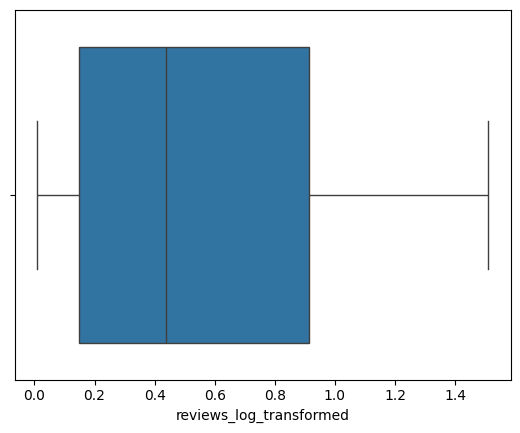

In [91]:
sns.boxplot(x=data1['reviews_log_transformed'])
plt.show()
